# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


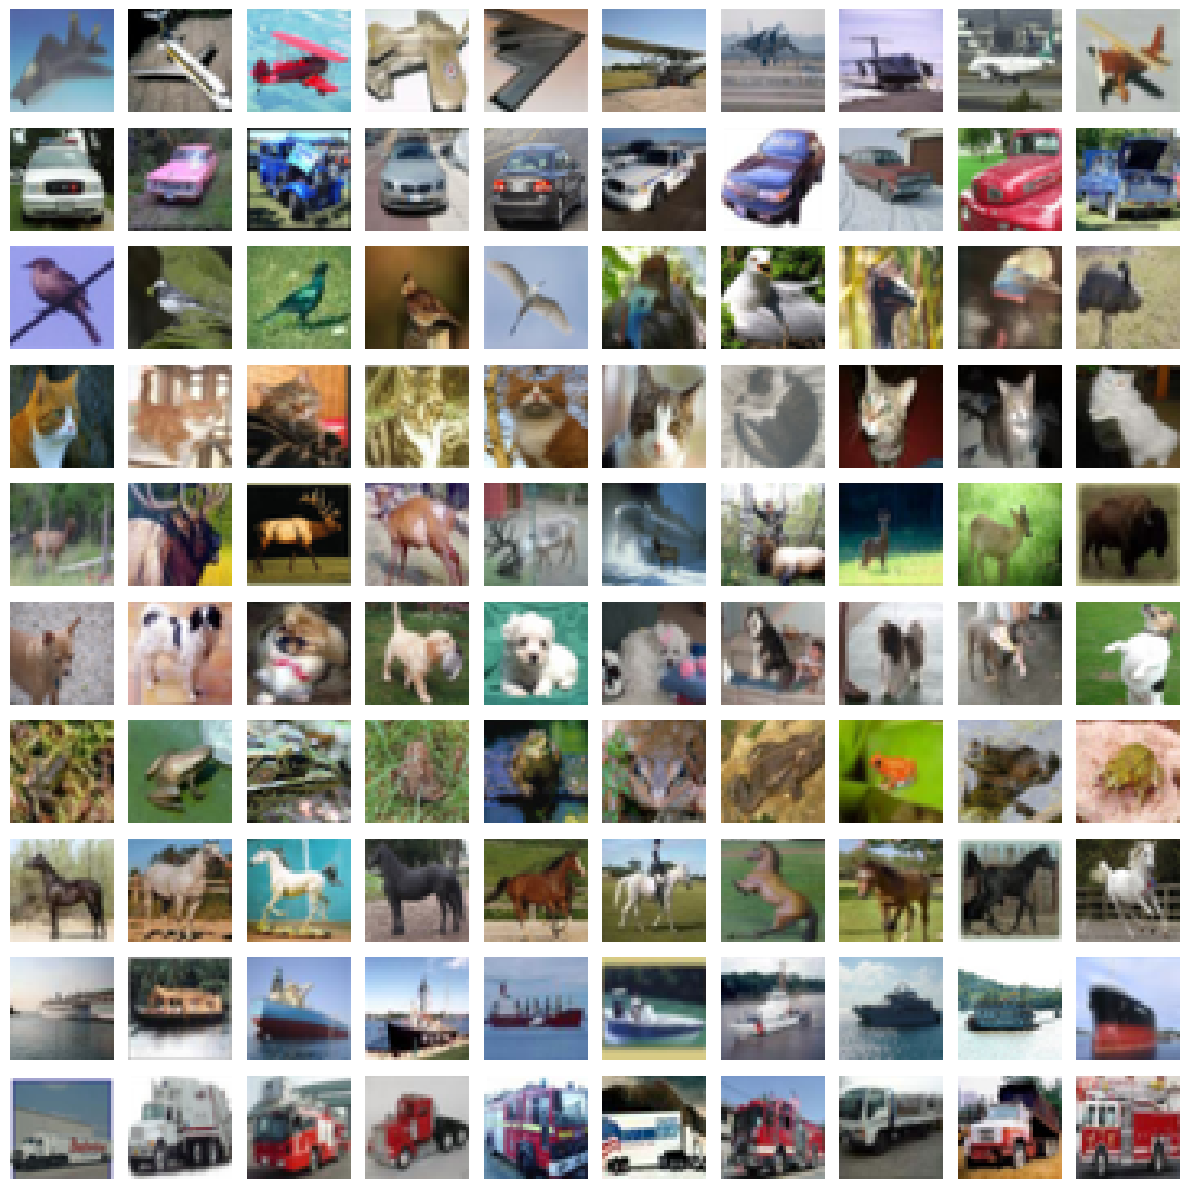

Shape of x_train_normalized: (50000, 32, 32, 3)
Shape of y_train_one_hot: (50000, 10)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Step 1: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Visualize the images in CIFAR-10 (10 random samples from each class)
# Define class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a 10x10 grid to display the images
fig, axes = plt.subplots(10, 10, figsize=(12, 12))

# Loop through each class
for i in range(10):
    # Get indices of all images of the current class
    class_indices = np.where(y_train == i)[0]

    # Select 10 random samples from the current class
    random_samples = np.random.choice(class_indices, 10, replace=False)

    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[random_samples[j]], cmap='viridis')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(class_names[i], fontsize=12)

plt.tight_layout()
plt.show()

# Step 3: Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Step 4: Normalize the images by rescaling pixel values to the range [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Output a brief check of the data
print("Shape of x_train_normalized:", x_train_normalized.shape)
print("Shape of y_train_one_hot:", y_train_one_hot.shape)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layer (3x3 filters, 32 filters, input shape (32, 32, 3))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Max pooling layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D features for the classifier
model.add(Flatten())

# Dense layer with 100 units
model.add(Dense(100, activation='relu'))

# Output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Print the model summary to see the architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.1479 - loss: 2.2769 - val_accuracy: 0.2253 - val_loss: 2.1914
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2451 - loss: 2.1575 - val_accuracy: 0.2875 - val_loss: 2.0507
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2886 - loss: 2.0293 - val_accuracy: 0.3101 - val_loss: 1.9648
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3191 - loss: 1.9516 - val_accuracy: 0.3291 - val_loss: 1.9270
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3285 - loss: 1.9180 - val_accuracy: 0.3319 - val_loss: 1.8913
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3375 - loss: 1.8849 - val_accuracy: 0.3434 - val_loss: 1.8597
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3517 - loss: 1.8588 - val_accuracy: 0.3565 - val_loss: 1.8377
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3587 - loss: 1.8325 - val_accuracy: 0.3687 - v

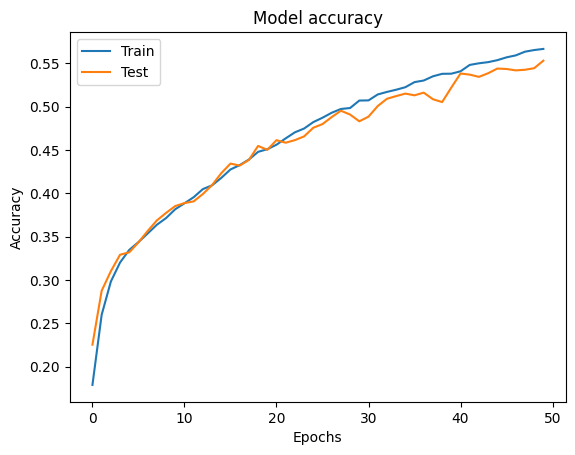

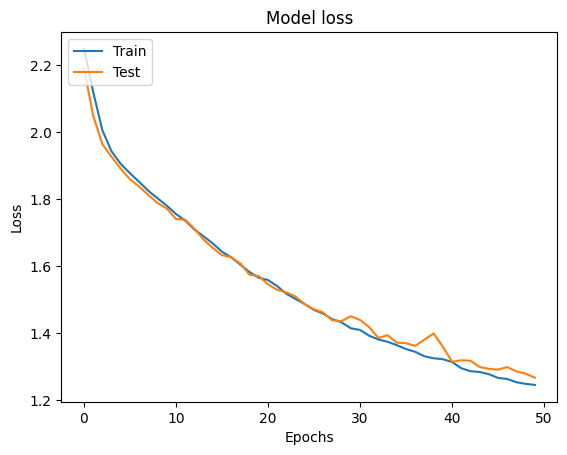

In [5]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Compile the model using categorical cross-entropy loss and SGD optimizer
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 1: Normalize the images and one-hot encode the labels (if not already done)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Step 2: Train the model with batch size of 512 and for 50 epochs
history = model.fit(x_train_normalized,
                    y_train_one_hot,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test_normalized, y_test_one_hot))

# You can plot the training history if you want to see the accuracy and loss graphs:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


*   Plot the cross entropy loss curve and the accuracy curve

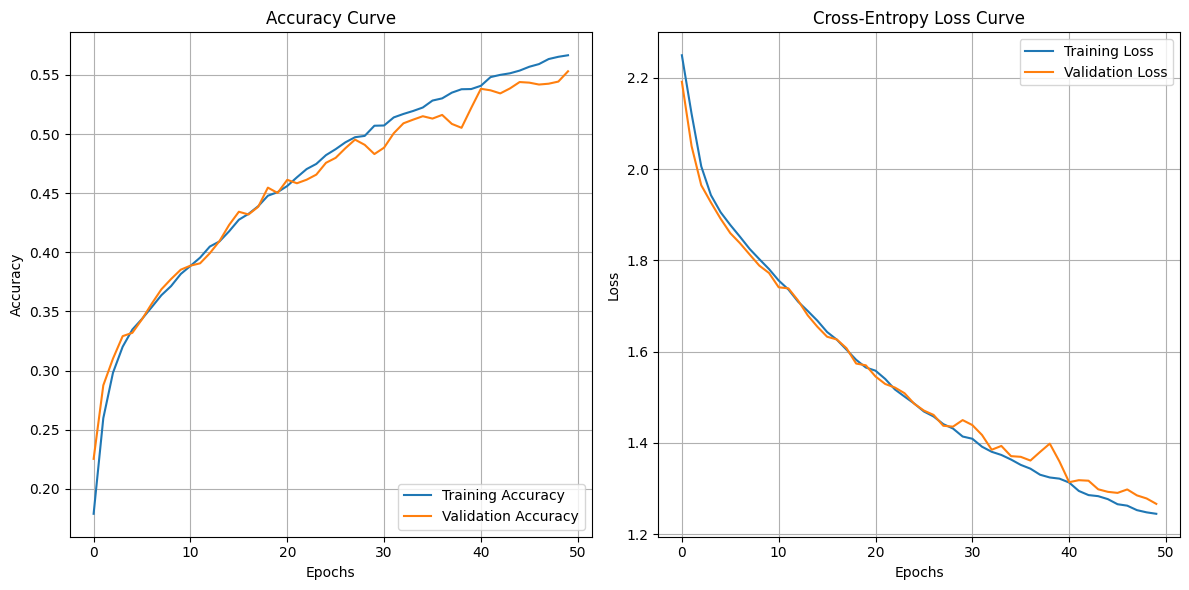

In [6]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot the training and validation loss (cross-entropy loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Define the deeper VGG-style model architecture
model = Sequential()

# First Convolutional Layer (32 filters, 3x3 kernel, same padding)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Second Convolutional Layer (32 filters, 3x3 kernel, same padding)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Max Pooling Layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model using SGD optimizer, categorical cross-entropy loss, and accuracy as the metric
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.1690 - loss: 2.2538 - val_accuracy: 0.2614 - val_loss: 2.0942
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2714 - loss: 2.0486 - val_accuracy: 0.3102 - val_loss: 1.9731
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3080 - loss: 1.9653 - val_accuracy: 0.3230 - val_loss: 1.9041
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3397 - loss: 1.8866 - val_accuracy: 0.3350 - val_loss: 1.8664
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3547 - loss: 1.8410 - val_accuracy: 0.3626 - val_loss: 1.7975
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3652 - loss: 1.7967 - val_accuracy: 0.3788 - val_loss: 1.7619
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3817 - loss: 1.7570 - val_accuracy: 0.3818 - val_loss: 1.7402
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3932 - loss: 1.7297 - val_accuracy: 0.4094 - 

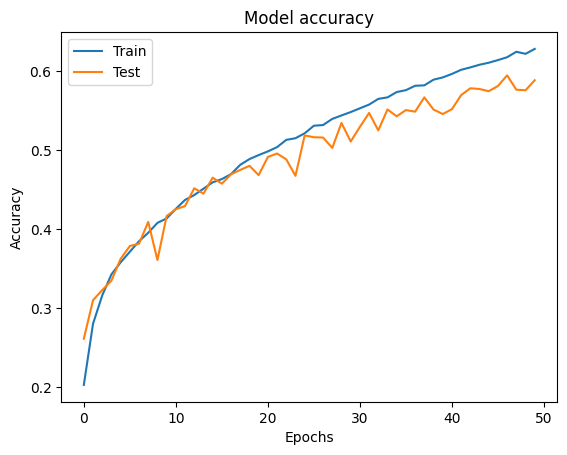

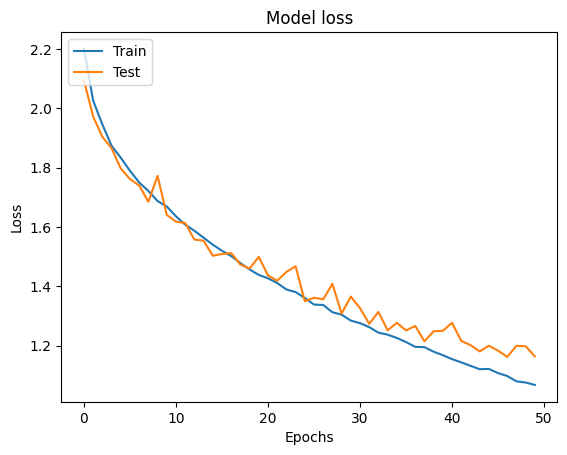

In [9]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Compile the model using categorical cross-entropy loss and SGD optimizer
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 1: Normalize the images and one-hot encode the labels (if not already done)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Step 2: Train the model with batch size of 512 and for 50 epochs
history = model.fit(x_train_normalized,
                    y_train_one_hot,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test_normalized, y_test_one_hot))

# You can plot the training history if you want to see the accuracy and loss graphs:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


NameError: name 'history_1' is not defined

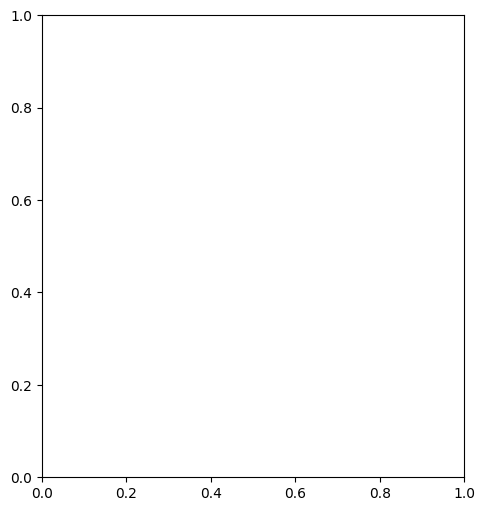

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already trained both models and saved the history of both:
# history_1: History object of the original model
# history_2: History object of the deeper VGG-style model

# Plot Training and Validation Accuracy for both models
plt.figure(figsize=(12, 6))

# Training accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Original Model - Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Original Model - Val Accuracy')
plt.plot(history_2.history['accuracy'], label='VGG Model - Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='VGG Model - Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Training and Validation Loss for both models
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Original Model - Train Loss')
plt.plot(history_1.history['val_loss'], label='Original Model - Val Loss')
plt.plot(history_2.history['loss'], label='VGG Model - Train Loss')
plt.plot(history_2.history['val_loss'], label='VGG Model - Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


**Comment on the observation**

*
Deeper Model vs. Simpler Model:
Training Accuracy: The deeper model (VGG-style) tends to have a higher training accuracy after a few epochs. This is expected, as a deeper network has more parameters and is capable of learning more complex patterns in the data. The simpler model may have a faster convergence but might plateau earlier and achieve lower performance.
Validation Accuracy: The deeper model might initially show signs of overfitting, where the training accuracy increases but the validation accuracy plateaus or even decreases. This indicates that while the model is learning well on the training data, it struggles to generalize to new, unseen data.
Loss Curves: The training loss for the deeper model will generally decrease slower than the simpler model, as it takes longer to adjust the more complex set of weights. However, if overfitting occurs, the validation loss will stop decreasing or even start increasing, indicating poor generalization.
Generalization:
If the validation accuracy of the deeper model is higher than the simpler model, it suggests that the additional complexity of the deeper model is allowing it to generalize better.
If the validation accuracy of the deeper model is lower, it may indicate overfitting, where the model has learned the training data too well but struggles to generalize to the test set.
Overfitting:
If we observe that the training accuracy is much higher than the validation accuracy, the deeper model might be overfitting. In this case, techniques like dropout, weight decay, or early stopping could be considered to improve generalization.
*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


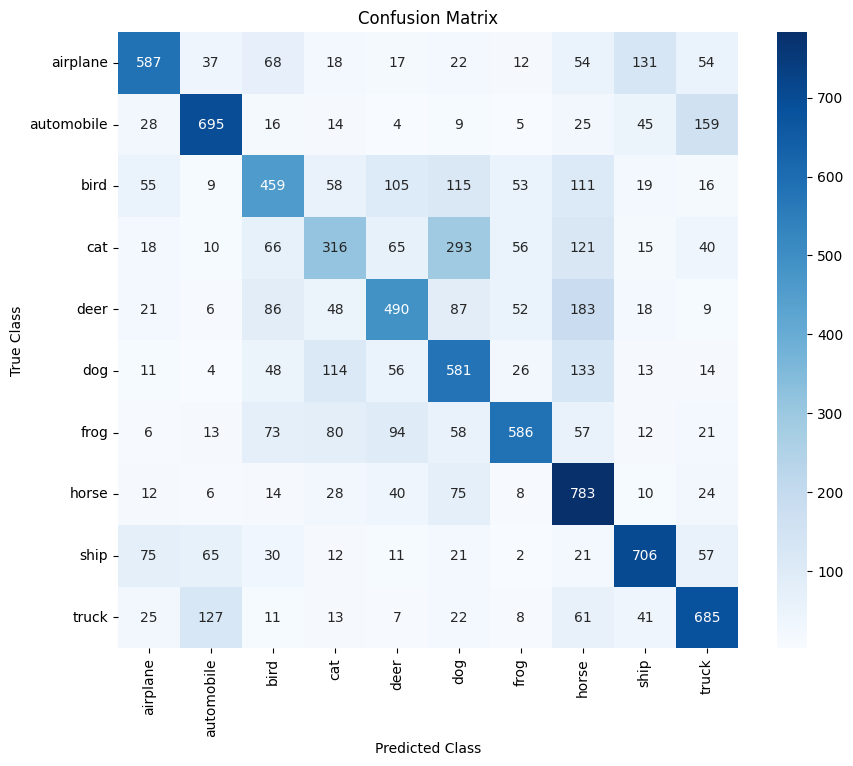

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Step 1: Predict the output for the test set
y_pred = model.predict(x_test_normalized)

# Step 2: Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the highest probability (predicted class)

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Step 4: Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


**Comment here :**

*
By inspecting the confusion matrix, we can identify specific class confusions:

Diagonal: The diagonal values represent the number of correctly classified images for each class. The higher these values, the better the model is at classifying that particular class.
Off-Diagonal Elements: These represent misclassifications, and we can look at the specific values to see which classes are often confused with one another. For example:
If the airplane class is frequently misclassified as the automobile class, it could indicate that these two classes share similar visual features (e.g., both having smooth shapes and wheels).
Misclassifications between similar objects like cat and dog or frog and cat could occur if the model struggles to distinguish these classes due to their visual similarities.
Insight:
If certain classes are consistently misclassified, this could inform us about potential areas for improvement, such as enhancing the dataset with more diverse examples, augmenting data, or tuning the model to better differentiate between those classes.
Conclusion:
The confusion matrix provides valuable insights into where the model is making mistakes and which classes are difficult to differentiate.
You can use this information to adjust the model, try data augmentation, or collect more diverse data to improve performance.
 *

...

*    Print the test accuracy for the trained model.

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_one_hot)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5998 - loss: 1.1529
Test Accuracy: 58.88%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [14]:
from keras.backend import clear_session
clear_session()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the VGG-like model for CIFAR-10 with input size 64x64
model = Sequential()

# Convolutional Block 1: 2 Conv layers with 64 filters, followed by MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2: 2 Conv layers with 128 filters, followed by MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3: 2 Conv layers with 256 filters, followed by MaxPooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into a dense layer
model.add(Flatten())

# Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer with 10 units (for CIFAR-10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model using SGD optimizer, categorical cross-entropy loss, and accuracy as the metric
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Step 1: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Resize the images to 64x64 using the Resizing layer
x_train_resized = tf.image.resize(x_train, (64, 64)).numpy()
x_test_resized = tf.image.resize(x_test, (64, 64)).numpy()

# Step 3: Normalize the images to the range [0, 1]
x_train_resized = x_train_resized.astype('float32') / 255.0
x_test_resized = x_test_resized.astype('float32') / 255.0

# Step 4: One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Output the shape of the resized images
print("Resized x_train shape:", x_train_resized.shape)
print("Resized x_test shape:", x_test_resized.shape)


Resized x_train shape: (50000, 64, 64, 3)
Resized x_test shape: (10000, 64, 64, 3)


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions are crucial in a neural network because they introduce non-linearity into the model, allowing it to learn complex patterns and functions. Without activation functions, a neural network would behave like a linear model, regardless of how many layers it has, because a composition of linear functions is still a linear function.

The primary purposes of activation functions are:

Non-linearity: Enable the network to learn non-linear relationships, which is vital for solving complex tasks like image recognition, speech processing, etc.
Introducing thresholds: Some activation functions, like ReLU, turn negative inputs to zero, which introduces sparsity and helps improve the performance of the model.
Control outputs: Activation functions like sigmoid and softmax help constrain the output of a neuron, such as outputting values between 0 and 1 (for probability estimation).


_

2 - Key Differences between sigmoid and softmax:

Both sigmoid and softmax are activation functions commonly used in classification tasks, but they differ in how they are used:

Sigmoid Activation:
Range: Outputs a value between 0 and 1, typically used for binary classification (two possible outcomes).
Output: It outputs the probability for each individual class, but it doesn't take into account other class probabilities. It treats each class as independent.
Use Case: Commonly used for binary classification problems (e.g., distinguishing between two classes).

Softmax Activation:
Range: Outputs a probability distribution over multiple classes, where the sum of all output probabilities is equal to 1. It is used when there are more than two classes (multi-class classification).
Output: Softmax normalizes the outputs to form a probability distribution over all possible classes, considering all other classes in the computation of each class's probability.
Use Case: Used in multi-class classification problems (e.g., classifying an image into one of many classes).
Formula:
softmax

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Both categorical crossentropy and binary crossentropy are loss functions used in classification tasks, but they are used for different types of classification problems:

Categorical Crossentropy Loss:
Use Case: Used for multi-class classification where each instance belongs to one of many classes (more than two classes).
Output: The target labels are usually one-hot encoded (a vector with a 1 for the correct class and 0 for all others).
Example: Used in multi-class classification problems like CIFAR-10 (10 classes) or MNIST (10 classes).
Binary Crossentropy Loss:
Use Case: Used for binary classification where each instance belongs to one of two classes.
Output: The target labels are usually a single value (0 or 1) representing the two classes.
Example: Used in binary classification problems like distinguishing between two classes (e.g., spam vs. not spam).


_
